<a href="https://colab.research.google.com/github/ML-HW-SYS/a4-WDaugherty/blob/main/2_svd_rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-Rank Approximation

In this section, you will be asked to investigated how the trade-off between
the selected ranks of SVD and its performance in terms of reconstruction
accuracy and speed-up (in clock-time and in FLOPS).

## 1. Set-up

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
# with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
#     handle = f.readline().strip()

In [ ]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = 'WDaugherty'
BRANCH = "main"

%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/gdrive/MyDrive/ece5545

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-WDaugherty' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-WDaugherty
Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.
/content/gdrive/MyDrive/ece5545


In [ ]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

Verify the following cell prints your github repository.

In [ ]:
!ls {PROJECT_ROOT}


1-numerical_precision.ipynb  arr.npz  mnist.py	   README.md	src
2-svd_rank.ipynb	     data     __pycache__  results.txt	tests


In [ ]:
# Install required packgaes
!pip install torch numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Rank v.s. Reconstruction Error

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the reconstruction error of the matrix (in the y-axis, measured by the Frobenius Norm).

NOTE: you can use `svd(A, torch.eye(A.shape(2), rank_A=<rank>, rank_B=None)` to do SVD, drop the rank
to `<rank>`, and return the reconstruction matrix of `A`.

We will provide a series of matrix for you to study. Please make one plot per matrix.
For each plot, comment on the trade-off between the number of ranks selected and the error by answering
the following questions:
1. Is the reconstruction error increasing or decreasing as we add more rank?
2. How fast is the reconstruction error change as we add more rank? Is it changing quickly or slowly? Why?
3. Is there a rank number below/above which the reconstruction error increase significantly?
4. What can you learn about this data?

/content/gdrive/MyDrive/ece5545/a4-WDaugherty
[43.50857, 6.2953696, 0.0019131622]


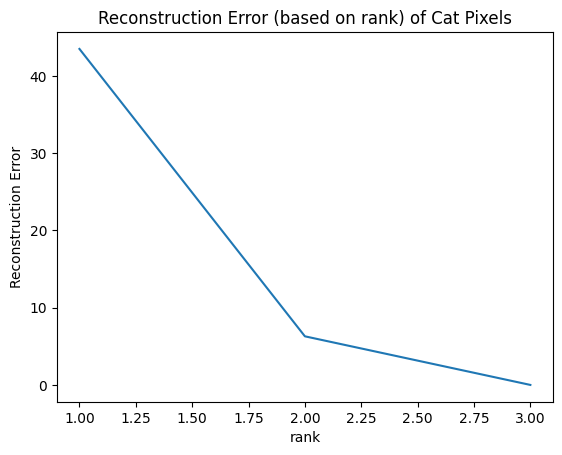

In [ ]:
%cd a4-WDaugherty/
from src.matmul import svd
import torch
import matplotlib.image
import numpy as np
import matplotlib.pyplot as plt

# Pixels of a cute cat
A = torch.from_numpy(matplotlib.image.imread("data/cat.png")).view(-1, 3)


ranks = list(range(1, 4))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

print(errors)
plt.plot(ranks, errors)
plt.title("Reconstruction Error (based on rank) of Cat Pixels")
plt.xlabel("rank")
plt.ylabel("Reconstruction Error")
plt.show()


[524.57666, 502.44394, 481.4509, 461.38498, 443.57413, 428.518, 415.96304, 405.06223, 395.3136, 386.2012, 378.38895, 370.5347, 362.94534, 355.97156, 349.4667, 343.08838, 337.07306, 331.44595, 325.9172, 320.4871, 315.43326, 310.39453, 305.36777, 300.67093, 296.0508, 291.55463, 287.00302, 282.8371, 278.83755, 274.79395, 270.92767, 267.17862, 263.4493, 259.82324, 256.34308, 252.95673, 249.7544, 246.55579, 243.41493, 240.43289, 237.49023, 234.61182, 231.8127, 229.05692, 226.3548, 223.67055, 221.07109, 218.58221, 216.1485, 213.72472, 211.3984, 209.06856, 206.75156, 204.52504, 202.3858, 200.24525, 198.2246, 196.24895, 194.30682, 192.39021, 190.55879, 188.7566, 186.94958, 185.20705, 183.4693, 181.76663, 180.1021, 178.44339, 176.8109, 175.22742, 173.66122, 172.08994, 170.53813, 168.99654, 167.51251, 166.03831, 164.58655, 163.15262, 161.73508, 160.3649, 158.99971, 157.6388, 156.30963, 154.97873, 153.65495, 152.34544, 151.09897, 149.8647, 148.64429, 147.46194, 146.29884, 145.13925, 143.99908, 14

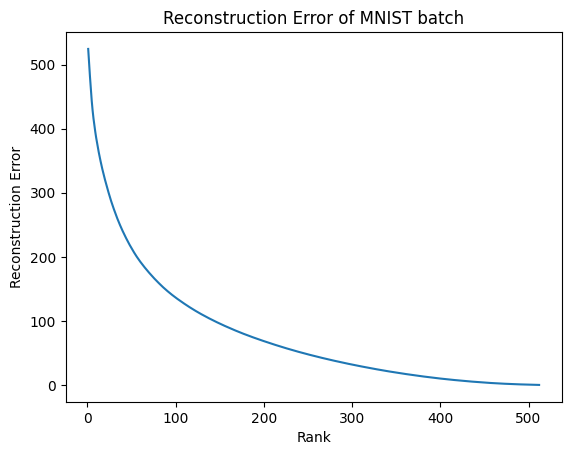

In [ ]:
# A batch of MNIST digit
import torch
A = torch.load("data/mnist_act.pt")['act.0']
ranks = list(range(1, 513))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

print(errors)
plt.plot(ranks, errors)
plt.title("Reconstruction Error of MNIST batch")
plt.xlabel("Rank")
plt.ylabel("Reconstruction Error")
plt.show()

[509.57013, 507.65155, 505.7451, 503.86353, 501.992, 500.1312, 498.276, 496.4333, 494.6066, 492.78503, 490.9672, 489.1726, 487.38553, 485.6104, 483.8513, 482.0916, 480.3325, 478.58035, 476.82858, 475.08554, 473.36374, 471.6471, 469.94125, 468.2365, 466.54184, 464.8487, 463.15604, 461.4688, 459.7944, 458.1261, 456.46335, 454.79782, 453.13937, 451.48782, 449.84467, 448.20883, 446.58353, 444.96237, 443.34198, 441.72357, 440.1031, 438.49832, 436.89078, 435.29126, 433.69897, 432.11194, 430.52863, 428.9554, 427.38046, 425.8132, 424.24487, 422.68463, 421.12866, 419.57333, 418.0249, 416.47745, 414.9381, 413.4023, 411.874, 410.35422, 408.83688, 407.3171, 405.79333, 404.27756, 402.7615, 401.25284, 399.74606, 398.23953, 396.7413, 395.2484, 393.75485, 392.26355, 390.77594, 389.28955, 387.8063, 386.3305, 384.85587, 383.38873, 381.92258, 380.45627, 379.00302, 377.5505, 376.09576, 374.65323, 373.2141, 371.77246, 370.335, 368.8977, 367.46927, 366.04428, 364.6173, 363.2002, 361.7787, 360.35663, 358.941

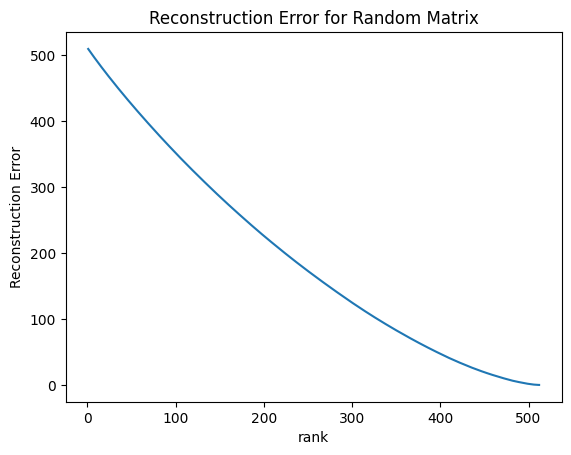

In [ ]:
import torch
# A random matrix
A = torch.randn(512, 512)

ranks = list(range(1, 513))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

print(errors)
plt.plot(ranks, errors)
plt.title("Reconstruction Error for Random Matrix")
plt.xlabel("rank")
plt.ylabel("Reconstruction Error")
plt.show()


[491.98193, 468.8563, 449.26236, 431.07812, 414.23172, 397.4779, 385.598, 374.29428, 364.1387, 355.08698, 346.2724, 338.55957, 331.44736, 324.57257, 317.89264, 311.79013, 305.78317, 300.23795, 294.9507, 289.70932, 284.80624, 280.22745, 275.70337, 271.48868, 267.56018, 263.72754, 259.90692, 256.18533, 252.64497, 249.31715, 246.06433, 242.90652, 239.78954, 236.74854, 233.9127, 231.20125, 228.51991, 225.91399, 223.3918, 220.88474, 218.46754, 216.08, 213.73943, 211.42313, 209.16666, 206.91129, 204.77113, 202.75284, 200.7495, 198.74582, 196.79918, 194.85907, 192.96884, 191.15561, 189.32904, 187.54277, 185.83394, 184.14322, 182.49002, 180.86594, 179.2563, 177.6775, 176.1393, 174.6447, 173.14142, 171.71774, 170.30066, 168.8921, 167.50667, 166.16408, 164.83844, 163.54144, 162.24648, 160.99135, 159.74258, 158.50499, 157.27249, 156.05147, 154.8509, 153.66316, 152.49094, 151.312, 150.14783, 148.98395, 147.82649, 146.70976, 145.60986, 144.52023, 143.44319, 142.39616, 141.3497, 140.32314, 139.30585

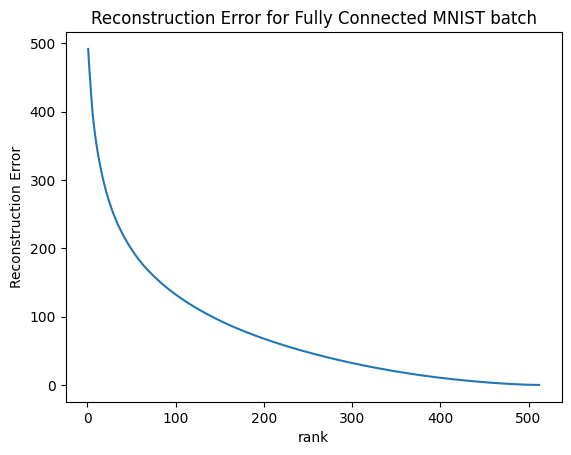

In [ ]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

ranks = list(range(1, 513))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

print(errors)
plt.plot(ranks, errors)
plt.title("Reconstruction Error for Fully Connected MNIST batch")
plt.xlabel("rank")
plt.ylabel("Reconstruction Error")
plt.show()

[11.7076435, 11.038353, 10.433762, 9.893985, 9.375356, 8.942674, 8.552019, 8.205107, 7.9054227, 7.7017355, 7.562014, 7.427782, 7.316069, 7.213111, 7.1126227, 7.017451, 6.9248857, 6.8352313, 6.7460594, 6.666437, 6.58861, 6.5119786, 6.439083, 6.3686905, 6.299124, 6.230106, 6.163374, 6.0970936, 6.033072, 5.970818, 5.908023, 5.8464546, 5.785369, 5.7247715, 5.6646013, 5.604394, 5.5452433, 5.486456, 5.4275813, 5.3689055, 5.311837, 5.2549376, 5.1981077, 5.14265, 5.086693, 5.031034, 4.9757195, 4.920707, 4.8660865, 4.8117137, 4.7572994, 4.703493, 4.6499023, 4.596689, 4.543541, 4.4903803, 4.4373097, 4.3854136, 4.333605, 4.2814965, 4.22927, 4.1774077, 4.1254406, 4.074441, 4.023293, 3.9724553, 3.9210482, 3.8694491, 3.8184016, 3.76709, 3.7155826, 3.6650848, 3.6141932, 3.5633538, 3.5125628, 3.4611542, 3.4099038, 3.3590145, 3.3081443, 3.257815, 3.207361, 3.1573017, 3.1073694, 3.057152, 3.0069115, 2.9561725, 2.9054873, 2.8549182, 2.8036132, 2.751854, 2.700456, 2.6489902, 2.5969758, 2.5445292, 2.492807

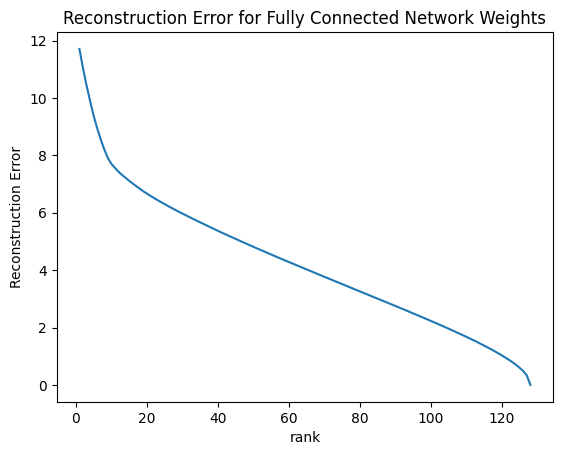

In [ ]:
import torch
# Weight matrix of a fully connected neural network (trained on MNIST)
A = torch.load("data/mnist_fc.pt")['fc2.weight']
ranks = list(range(1, 129))
errors = []
for rank in ranks:
    reconstructed_A = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    errors.append(np.linalg.norm(A - reconstructed_A))

print(errors)
plt.plot(ranks, errors)
plt.title("Reconstruction Error for Fully Connected Network Weights")
plt.xlabel("rank")
plt.ylabel("Reconstruction Error")
plt.show()

# 2. Rank v.s. Speed up

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the speed up of matrix-matrix multiply (in the y-axis, measured by both FLOPs and clock time)

You can assume both matrix A and B are using the same number of rank when approximating.

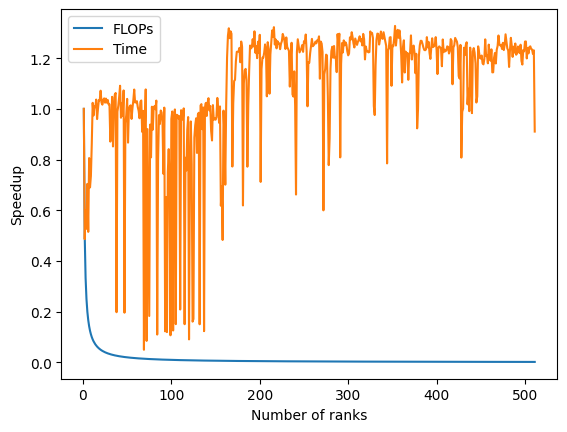

In [ ]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt

# Load the input and weight matrices
A = torch.load("data/mnist_act.pt")['act.1']
B = torch.load("data/mnist_fc.pt")['fc2.weight'].transpose(0, 1)

# Singular value decomposition of matrix A
u, s, v = torch.svd(A)
s_np = s.detach().numpy()

# Compute matrix-matrix multiplication using original matrix B
start_time = time.time()
_ = torch.matmul(A, B)
original_time = time.time() - start_time

# Compute matrix-matrix multiplication using low-rank approximation of A and B
flops = []
times = []
for r in range(1, len(s)):
    # Construct low-rank approximation of matrix A
    A_approx = torch.mm(u[:, :r], torch.mm(torch.diag(s[:r]), v[:, :r].transpose(0, 1)))

    # Compute matrix-matrix multiplication using low-rank approximation of A and B
    start_time = time.time()
    _ = torch.matmul(A_approx, B)
    times.append(time.time() - start_time)

    # Compute FLOPs
    n, m = A.shape
    flops.append(2 * r * (n * m + m))

# Plot number of ranks vs. speedup (FLOPs)
import matplotlib.pyplot as plt
plt.plot(range(1, len(s)), np.array(flops[0])/np.array(flops), label='FLOPs')
plt.plot(range(1, len(s)), np.array(times[0])/np.array(times), label='Time')
plt.xlabel('Number of ranks')
plt.ylabel('Speedup')
plt.legend()
plt.show()